In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import scipy.stats as stats

## Lecture 16

### Learning objectives

- Typesetting mathematics in Markdown.
- Curve fitting bivariate data with NumPy.
- Apply line fitting to determine the age of the Universe. 
- Over-fitting and under-fitting.
- A brief introduction to **scikit-learn**.


### 16.1 Bivariate statistics

Until now, we've  worked with  data that do not depend on other data - they are _univariate_.  But there are many examples in the Earth Sciences where we are interested in the dependence of one set of data on another (*bivariate data*) or even *multivariate data* which will  get to in later lectures.  This lecture focusses on _bivariate data_.  For an example of bivariate data in Earth Science consider these cases: the distance from the ridge crest versus age gives you a spreading rate; the depth in a sediment core versus age gives you a sediment accumulation rate; the ratio of the radioactive form of carbon, $^{14}$C, to a stable form,$^{12}$C, is a function of the age of the material being dated. And we already saw that the difference in arrival times of the $P$ and $S$ seismic waves is related to distance from the source to the receiver. These examples rely on the use of bivariate statistics to get at the desired relationships.   

### 16.2 Age of the universe

My favorite example of bivariate data in Earth (and Space) Science is to the  use of retreat velocity of galaxies as a function of their distance to determine the age of the universe (how cool is that!).  This is the basic relationship that underlies what has come to be known as "Hubble's Law" (same Hubble as for the Hubble telescope). 

Hubble published his results in 1929 [Hubble, E. P. (1929) Proc. Natl. Acad. Sci., 15, 168–173.]  At the time,  it was unclear whether the universe was static, expanding, or collapsing. Hubble hypothesized that if the universe were expanding, then everything in it would be moving away from us. The greater the distance between the Earth and the galaxy, the faster it must be moving.  So all he had to do was measure the distance and velocity of distant galaxies.  Easy-peasy - right?  

To measure velocity, Hubble made use of the doppler shift. To understand how this works, recall that the pitch you hear as an ambulance approaches changes. During doppler shift, the ambulance's pitch changes from high (as it approaches) to low (as it recedes). The pitch changes  because the relative frequency of the sound waves changes. The frequency increases as the ambulance approaches, leading to a higher pitch, and then decreases as it moves away, resulting in a lower pitch.  

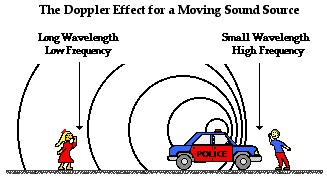

In [2]:
Image(filename='Figures/doppler.jpg',width=400)

_Figure from [https://www.physicsclassroom.com/class/waves/Lesson-3/The-Doppler-Effect](https://www.physicsclassroom.com/class/waves/Lesson-3/The-Doppler-Effect)_

 
The same principle applies to light, but rather than hear a change in frequency, we observe a shift in the wavelength (the color) detected from the galaxy. But how can we measure this shift?  Recall our class on solar elemental abundances that stars are made primarily of hydrogen. Hydrogen, like all atoms,  absorbs energy at discrete wavelengths associated with the excitation of electrons.  So if light passes through hydrogen, it will lose energy at those specific wavelengths.  If a star or galaxy is moving away from us, these distinct absorption bands (detected as black bands in the spectrum of light) are shifted towards longer wavelengths - the red end of the visible spectrum. The faster the star or galaxy travels away from the observer, the greater the shift will be to the red: 


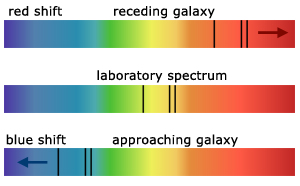

In [3]:
Image(filename='Figures/dopp-redshift.jpg', width=400)

_Figure from [http://www.a-levelphysicstutor.com/wav-doppler.php](http://www.a-levelphysicstutor.com/wav-doppler.php)_

So, Hubble measured the red shift of different galaxies and converted them to velocities.  
He then estimated the distance to these objects, which is harder to do.  There are many ways to do this and you can look them up, if you like.  In any case, we can use this dataset

http://keyah.asu.edu/lessons/AgeOfUniverse/Exercises.html

which contains distances to different galaxies and their velocities. 


Before we read in the data and plot them, let's learn about styling text in **matplotlib**. To create nice labels with superscripts, we can use latex styling, the same as in a markdown cell.  For a superscript, first we need to encase the text in dollar signs (`$`) and then use the `^` symbol to make the following text a superscript. If there is more than one number in the superscript, you must enclose what you want as the superscript in curly braces.
For example, to print $10^3$, we use:
```python
"$10^3$"
```
and for "per second" (s$^{-1}$), we use: 
```python
"s$^{-1}$"
```
For a subscript, replace the `^` symbol with an underscore (`_`) symbol.

Okay, now let's read in the data and take a look.

In [4]:
data = pd.read_csv('Datasets/redShiftDistance/d_v.csv', header=1)
print(data.head()) # take a peek

   d (10^3 Mpc)  v (10^3km/s)
0         0.028           2.7
1         0.076           4.2
2         0.108          10.5
3         0.136          14.1
4         0.153          10.5


We can plot the data as little red stars (`r*`) and using the fancy latex styling tricks we just learned.

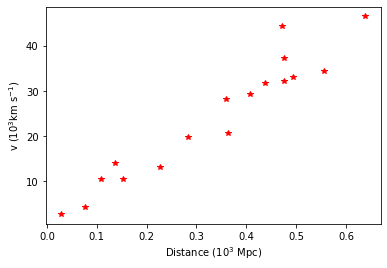

In [5]:
plt.plot(data['d (10^3 Mpc)'], data['v (10^3km/s)'], 'r*') # Plot the points as red stars
plt.ylabel('v (10$^3$km s$^{-1}$)') # Notice the latex style labels
plt.xlabel('Distance (10$^3$ Mpc)');

So, we have distance on the X axis in Megaparsecs and velocity on the Y axis in 10$^3$km/s.  

To calculate the age of the universe, we can use Hubble's logic:  

Here is "Hubble's Law":  $v = H_o d$, where $v$ is velocity, $d$ is distance, and $H_o$ is "Hubble's constant".  

This looks a lot like the equation for a line through the data ($y=mx + b$) where $m$ is the slope and $b$ is the y-intercept.  In this case, the y-intercept should be 0 or nearly so, and $m$ is $H_o$.  

We can calculate the coefficients $m$ and $b$  in **NumPy** fairly easily using a function called `np.polyfit()`. (A line is just a first degree polynomial after all).  

In [6]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

`np.polyfit()` can be used to calculate best fit lines (setting the degree (`deg`) to 1), or higher order curves (setting degree to 2 or higher).  

All we want is a best fit line for now, so let's see how well it does:  

In [7]:
print(np.polyfit(data['d (10^3 Mpc)'], data['v (10^3km/s)'], 1))

[70.34540511  0.73733205]


Ahah!  So $H_o$, the slope of the best-fit line,  is 70.3 (in some weird units).  

Before going on, let's plot the best fit line on our graph.  

We can assign the best fitting slope and y-intercept from `np.polyfit()` to a variable (`m_b`) and feed that to another function `np.polyval()` which will calculate new Y values using the model of a linear fit: 

In [8]:
help(np.polyval)

Help on function polyval in module numpy:

polyval(p, x)
    Evaluate a polynomial at specific values.
    
    If `p` is of length N, this function returns the value:
    
        ``p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]``
    
    If `x` is a sequence, then `p(x)` is returned for each element of `x`.
    If `x` is another polynomial then the composite polynomial `p(x(t))`
    is returned.
    
    Parameters
    ----------
    p : array_like or poly1d object
       1D array of polynomial coefficients (including coefficients equal
       to zero) from highest degree to the constant term, or an
       instance of poly1d.
    x : array_like or poly1d object
       A number, an array of numbers, or an instance of poly1d, at
       which to evaluate `p`.
    
    Returns
    -------
    values : ndarray or poly1d
       If `x` is a poly1d instance, the result is the composition of the two
       polynomials, i.e., `x` is "substituted" in `p` and the simplified
       resu

In [9]:
# Save the statistics in an array called m_b
m_b = np.polyfit(data['d (10^3 Mpc)'], data['v (10^3km/s)'], 1)
print(m_b) # See if that worked

[70.34540511  0.73733205]


`m_b` seems to be an array of coefficients, where the first is the slope and the second is the y-intercept.  

Let's feed `m_b` into `np.polyval()`, along with our X array to get a new set of Y values, assuming a linear fit. Then we can plot the model data as a black line along with the original Y values. 

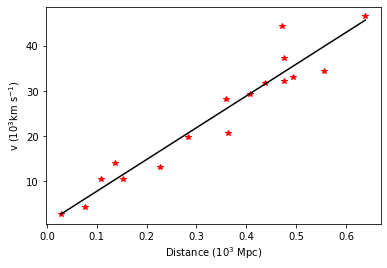

In [10]:
modelYs = np.polyval(m_b,data['d (10^3 Mpc)'])
# Now plot the data and the best-fit line: 
plt.plot(data['d (10^3 Mpc)'], data['v (10^3km/s)'], 'r*')
plt.plot(data['d (10^3 Mpc)'], modelYs,'k-') # Plot as black line
plt.ylabel('v (10$^3$km s$^{-1}$)')
plt.xlabel('Distance (10$^3$ Mpc)');

It would be handy to also know how well our data fit the model (not everything is linear, after all).  

To do that, we need a different function: `scipy.stats.linregress()`. 

In [11]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

And use it, to get what is normally called the $R^2$ value, which when equals 1.0, it represents perfect agreement.

In [12]:
print(stats.linregress(data['d (10^3 Mpc)'], data['v (10^3km/s)']))
# and save the statistics as: 
slope, intercept, r_value, p_value, std_err = stats.linregress(data['d (10^3 Mpc)'],data['v (10^3km/s)'])
print('\n')
print('slope: %7.3f, intercept: %4.1f, R^2: %5.3f'%\
    (slope, intercept, r_value**2))

LinregressResult(slope=70.3454051109073, intercept=0.7373320540551447, rvalue=0.9597033494468423, pvalue=1.1305829341930723e-09, stderr=5.318421299079921)


slope:  70.345, intercept:  0.7, R^2: 0.921


Not a bad fit!  The Universe is expanding.   

Now let's get back to Hubble's Law and the age of the universe.  

We had $v=H_o d$ as Hubble's law and we know that distance = velocity x time, or,  $d=vt$.  So, if we divide both sides by $v$ and  we get: 

1=$H_o$t. 

Solving for $t$ (the age of the universe), we get 

$t=1/H_o$ [in some weird units.]

In [13]:
print(1.0/slope)
t = 1.0/slope

0.014215569565963685


But the units are weird (not years,  per Mpc s/km).  To fix this, we need to know how many kilometers are in a megaparsec.  As it happens,  there are 3.09 x 10$^{19}$ km/Mpc.  \[I bet you didn't know that off-hand. You're welcome. \]
So, we can calculate the age of the universe in seconds (`age_sec`) by converting the megaparsecs to km:

Age (s) = $t \frac{s \cdot Mpc}{km}$ x $3.09 x 10^{19} \frac {km}{Mpc}$

In [14]:
age_sec = t * 3.09e19
print(age_sec)

4.392610995882779e+17


That's a lot of seconds!  We should convert seconds to years.  Here's another fun fact: there are approximately   $\pi$ x 10$^7$ seconds in a year. 

More precisely, there are 60(s/min) x 60(min/hr) x 24(hr/day) x 365.25 (days/yr)
 

In [15]:
sec_yr = 60.0 * 60.0 * 24.0 * 365.25
print('%e'%(sec_yr))

3.155760e+07


Ok.  so not exactly $\pi \times 10^7$, but close....  

In [16]:
age_yrs = age_sec / sec_yr
print(age_yrs)

13919344297.040266


And now in billions of years please:  

In [17]:
print('Age of the universe: %5.2f' % (age_yrs*1.0e-9), 'Ga')

Age of the universe: 13.92 Ga


### 16.3 When data is not linear

There are many other curve fitting methods in **SciPy** and **NumPy**. I encourage you to look around when the need arises.  

As an example of a curved relationship, there are new data sets available for the classic Hubble problem. I found one published by Betoule et al. in 2014 [http://dx.doi.org/10.1051/0004-6361/201423413](http://dx.doi.org/10.1051/0004-6361/201423413).   Cosmologists plot things differently now than they did in Hubble's time. They use the parameters $z$ and $\mu$ which are related to the red shift velocity and distance.  $z$ is the fractional shift in the spectral wavelength and $\mu$ has something to do with distance. 

Here is a plot from the Betoule et al. paper: 

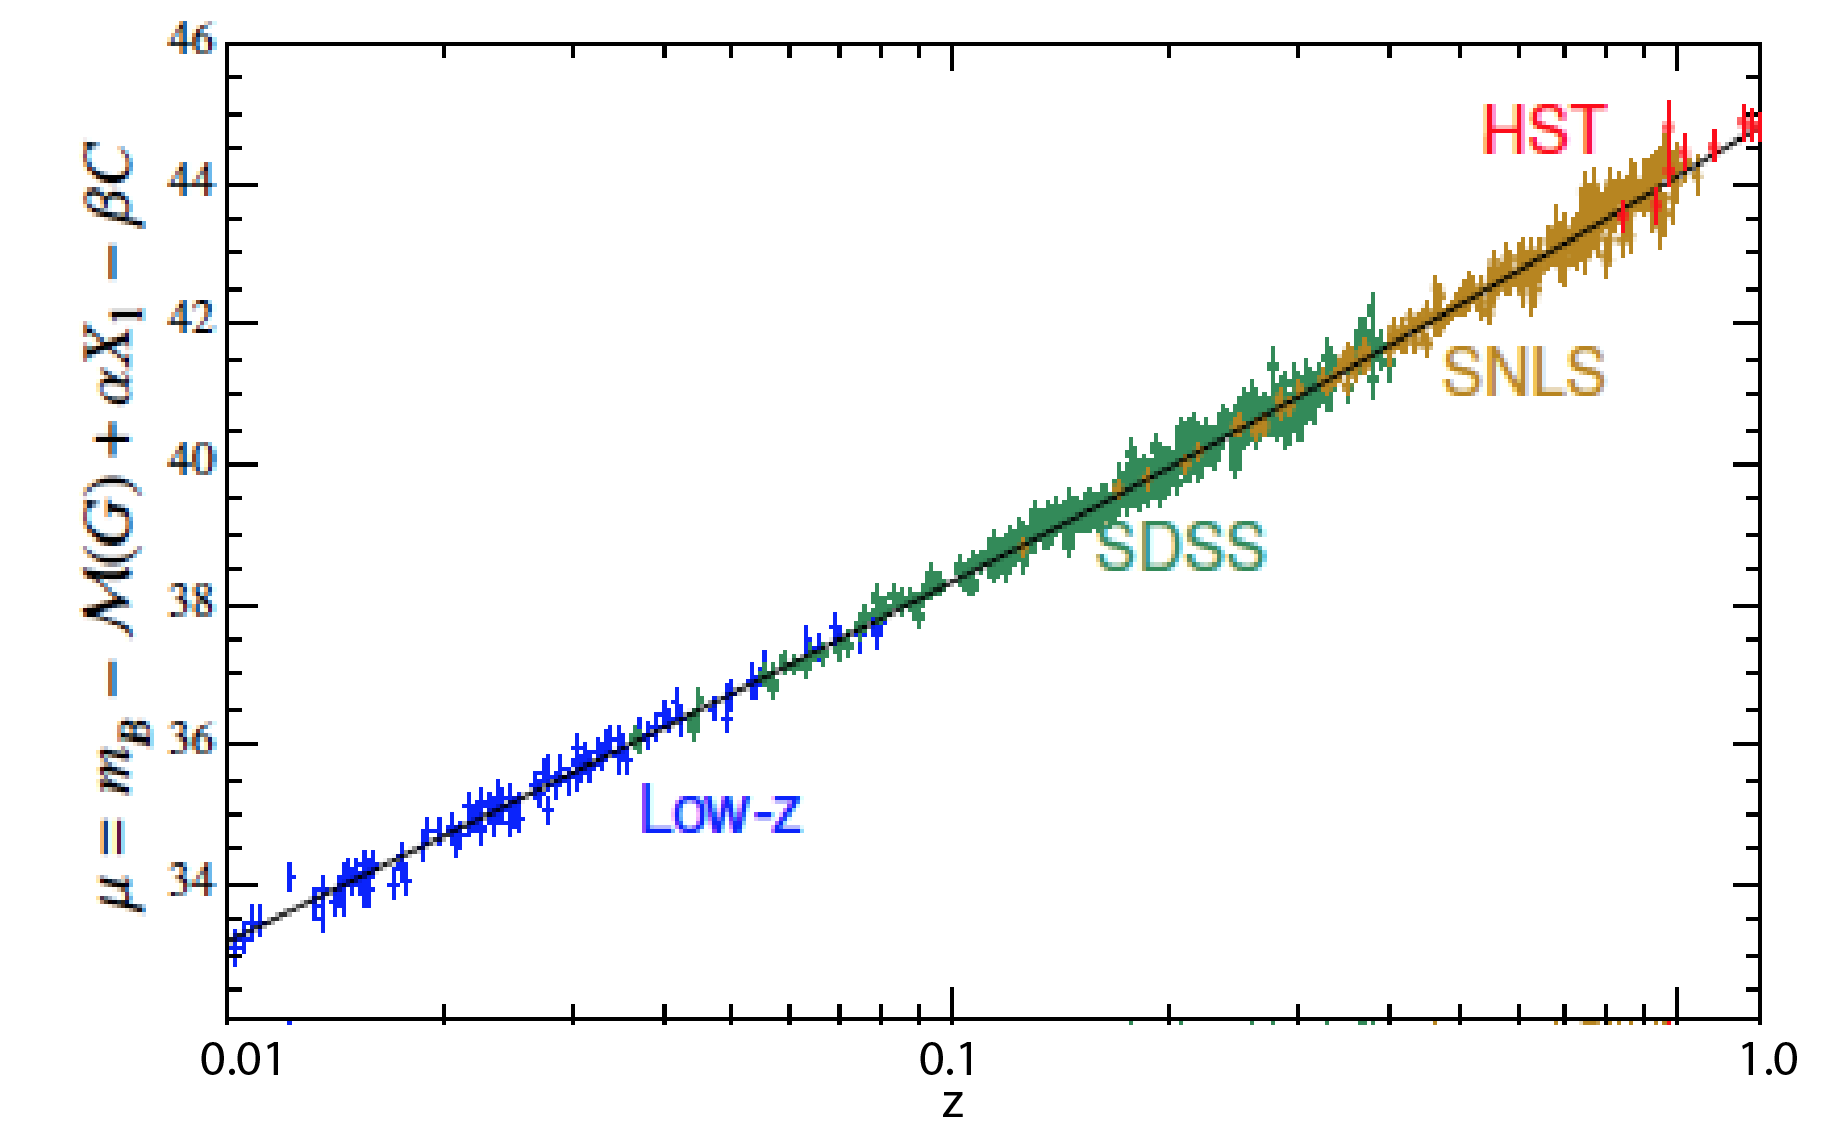

In [18]:
Image(filename='Figures/betoule14.png', width=400)

_[Figure modified from Betoule et al., 2014.]  The different colors are different types of objects (galaxies, supernovae, etc.)._  

Notice that they plotted the data on a log scale. (This hides some surprising things.)

To compare the old estimate of the age of the universe (~14 Ga) with that calculated from the new data set, we will need to convert $z$ and $\mu$ to distance and velocity.  


According to [http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html](http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html)

velocity $v$ (as fraction of the speed of light, $c$) is given by

${v\over c}= \bigl({{(z+1)^2-1}  \over {(z+1)^2+1}}\bigr)$

where $c=3 \times 10^8$m s$^{-1}$.  

And according to the Betoule et al. (2014) paper, $\mu$ relates to distance in parsecs $d$ like this:  



$\mu=5\log(d/10)$.   

Let's read in the data (available from this website:  http://cdsarc.u-strasbg.fr/viz-bin/qcat?J/A+A/568/A22#sRM2.2), which are averages of the data shown in the figure above,and take a peek.  




In [19]:
new_data = pd.read_csv('Datasets/redShiftDistance/mu_z.csv', header=1)
print(new_data.columns)

Index(['z', 'mu'], dtype='object')


 
Now we can plot them the same way as the cosmologists do, using $\mu$ and $\log z$: 

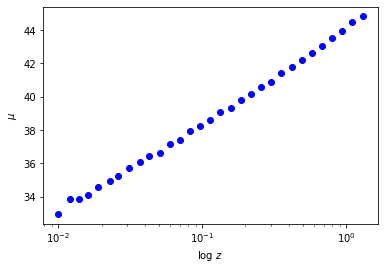

In [20]:
plt.semilogx(new_data.z, new_data.mu, 'bo')
plt.xlabel('log $z$')
plt.ylabel('$\mu$');

To compare the new data with the 'old' data, we must do the following:  
- Transform $z$  to velocity;  
- Transform  $\mu$ to distance using the equations provided;
- Truncate the new dataset which goes to much farther distances than the 'old' data set;
- Write a nice `lambda` function to recalculate the age of the universe.

Let's begin by writing a lambda function:  

In [21]:
# Function returns age in Ga for Ho
age_from_Ho = lambda Ho : 1.0e-9 * 3.09e19 / (Ho*np.pi*1.0e7)

Now we convert, truncate, and recalculate H$_o$:  


In [22]:
# Convert z to velocity in 10^3 km/s (or 10^6 m/s)
c = 3.0e8 # speed of light in m/s
new_data['velocity'] = 1.0e-6 * c * \
    (((new_data.z + 1.0)**2-1.0)/((new_data.z + 1.0)**2 + 1.0)) # The formula for v from z (and c)

# Convert mu to distance in 10^3 Mpc (a Gpc):
new_data['distance'] = 10.0 * (10.0**((new_data['mu'])/5.0)) * 1.0e-9 # Convert mu to Gpc
# and filter for the closest objects
close_data = new_data[new_data.distance < 0.7]

close_fit = np.polyfit(close_data['distance'], close_data['velocity'], 1) # Calculate the coefficients
close_modelYs = np.polyval(close_fit, close_data['distance']) # Get the model values

age = age_from_Ho(close_fit[0]) # get a new age 
print(age)

16.865755533316488


Wow - that is different!   

Now we can plot them and see what happened! 

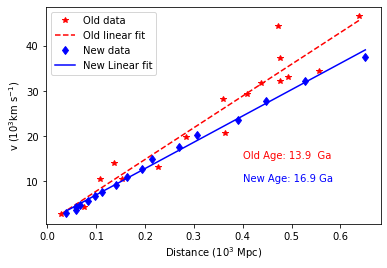

In [23]:
# Plot the old data (in red dots) with the new (in blue dots)
plt.plot(data['d (10^3 Mpc)'], data['v (10^3km/s)'], 'r*', label='Old data') # as red stars
plt.plot(data['d (10^3 Mpc)'], modelYs, 'r--', label='Old linear fit') # Plot old fit
plt.plot(close_data.distance, close_data.velocity, 'bd', label='New data') # as blue diamonds
plt.plot(close_data.distance, close_modelYs, 'b-', label='New Linear fit') # Plot old fit
plt.xlabel('Distance (10$^3$ Mpc)')
plt.ylabel('v (10$^3$km s$^{-1}$)')
plt.text(0.4, 15, 'Old Age: 13.9  Ga', color='red') # Put on a note with the old age
plt.text(0.4, 10, 'New Age: %4.1f'%age + ' Ga', color='blue') # Put on a note with the new age
plt.legend(numpoints=1, loc=2);  # Add a legend

It looks like the velocity estimates in the new data are slower than the velocities estimated in the old data. The age of the universe just got a lot older! But don't get too excited yet!

Although the two data sets look superficially similar, if you read the paper, you will see there are many adjustments required to calculate the distances (Hubble was in fact WAY off, almost by a factor of 10!).  

We filtered the data, so we only worked with 'near-by' object, less than 0.7 Mpc. But that only accounts for a small portion of the data set. Let's take a look at the entire dataset.  

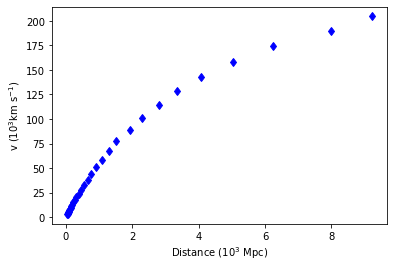

In [24]:
plt.plot(new_data.distance, new_data.velocity, 'bd', label='new data')
plt.ylabel('v (10$^3$km s$^{-1}$)')
plt.xlabel('Distance (10$^3$ Mpc)');

That doesn't look linear at all! The cosmologists believe that the expansion of the universe is accelerating. Why?  Ask your physics friends about dark energy.  Or read Neal de Grasse Tyson's "Astrophysics for People in a Hurry". I loved it. 

Given that the data are hardly linear, we should calculate the fit with a higher order polynomial instead of with a linear fit.   

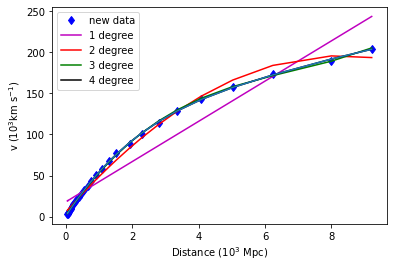

In [25]:
colors = ['m', 'm', 'r', 'g', 'k'] # Make a list of colors for plotting
plt.plot(new_data.distance, new_data.velocity, 'bd', label='new data')

# Try with higher degree polynomials
for deg in range(1, 5): # Degree of polynomial
    fit = np.polyfit(new_data['distance'], new_data['velocity'], deg) # second degree
    Y = np.polyval(fit, new_data['distance'])
    plt.plot(new_data.distance, Y, colors[deg], label="%i degree"%deg)
Y = np.polyval(fit, new_data['distance'])
plt.plot(new_data.distance, Y)
plt.ylabel('v (10$^3$km s$^{-1}$)')
plt.xlabel('Distance (10$^3$ Mpc)')
plt.legend(numpoints=1, loc=2);

So, it appears that a 3rd degree polynomial does the trick.  But this is an active area of research. Read this article in the New York times -
https://nyti.ms/2loeFoX and saved in Background/expandingUniverse.pdf.  The apparent acceleration may be controlled by _dark energy_ and values for H$_o$ hover between 67 (~14.7 Ga) and 73 (13.5 Ga). 

### 16.4 Over-fitting and under-fitting
Normally, using a high order polynomial is a bad idea, because of over-fitting. Of course, _under-fitting_ is also a bad idea.  So how do you choose?  

With over-fitting,  you can fit the data really well, but with a model that doesn't make much sense. To illustrate this, let's make a sine wave with some added noise and try to fit the data. First we'll try with an degree 6 polynomial.

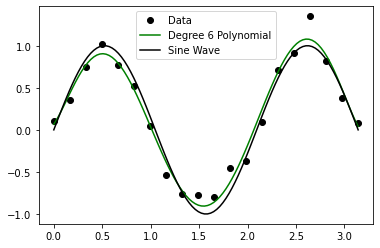

In [26]:
x = np.linspace(0, np.pi, 20)
sine_wave = np.sin(3*x) # Make a sine wave

normal_distribution = stats.norm(0, 0.15) # Create some 'noise' to add to the sine wave
y = sine_wave + normal_distribution.rvs(len(x)) # Add the noise to the  sine wave 

good_fit = np.polyfit(x, y, 6); # Fit with an degree 6 polynomial
interpolated_x = np.linspace(0, np.pi, 100) # Make an array of x values to make a continuous line
predicted_y = np.polyval(good_fit, interpolated_x) # Fit to the continuous line

plt.plot(x, y,'ko',label='Data') #Plot the noisy data data
plt.plot(interpolated_x, predicted_y, 'g', label='Degree 6 Polynomial') # Plot the original data
plt.plot(interpolated_x, np.sin(3*interpolated_x), 'k', label='Sine Wave')
plt.legend();

As we can see, an degree 6 polynomial approximates the sine wave relatively well, but not perfectly. Now let's try with an degree 13 polynomial:

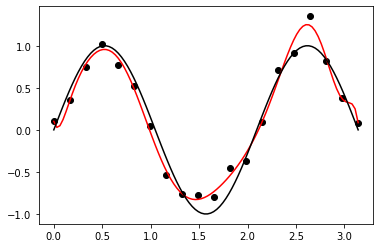

In [27]:
over_fit = np.polyfit(x, y, 13)
predicted_y = np.polyval(over_fit, interpolated_x)
plt.plot(x, y, 'ko', label='Data')
plt.plot(interpolated_x, predicted_y, 'r', label='Degree 13 Polynomial')
plt.plot(interpolated_x, np.sin(3*interpolated_x), 'k', label='Sine Wave'); 

The order 13 polynomial captured more of the noise than we wanted, and seems to go to odd values in other areas to be able to fit it. This is known as over-fitting. How do we deal with this? There are a few ways to do this.

### 16.5 Scikit-learn and curve fitting

**Scikit-learn** is a machine learning package which we will learn a lot about in later lectures. One of the things that **scikit-learn** can do well is regression as it offers many different types of regression, all contained within the `sklearn.linear_model` package. 

To use **scikit-learn**, we need to understand a few things.  First, it treats data  slightly differently than, for example `np.polyfit()`. It expects each data point to be described as an array of _features_ (think of these as "coordinates" for each datapoint). In our case the _features_ are $x$, $x^2$, $x^3$ etc. Fortunately, **scikit-learn** allows us to do this automatically using `sklearn.preprocessing.PolynomialFeatures`. 

So, to start, let's transform our data into something **scikit-learn** can understand. Let's make a data container and and take a look.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=13) # We're going to make a 13th degree fit to start with
x_transform = poly.fit_transform(x[:, np.newaxis]) # Makes our x data into a column array, rather than a row.
print(x_transform[:5]) 

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.65346982e-01 2.73396244e-02 4.52052437e-03
  7.47455061e-04 1.23589438e-04 2.04351406e-05 3.37888882e-06
  5.58689069e-07 9.23775512e-08 1.52743493e-08 2.52556755e-09
  4.17594972e-10 6.90480682e-11]
 [1.00000000e+00 3.30693964e-01 1.09358498e-01 3.61641950e-02
  1.19592810e-02 3.95486203e-03 1.30784900e-03 4.32497769e-04
  1.43024402e-04 4.72973062e-05 1.56409337e-05 5.17236235e-06
  1.71046901e-06 5.65641775e-07]
 [1.00000000e+00 4.96040945e-01 2.46056619e-01 1.22054158e-01
  6.05438600e-02 3.00322335e-02 1.48972175e-02 7.38962986e-03
  3.66555898e-03 1.81826734e-03 9.01935051e-04 4.47396715e-04
  2.21927089e-04 1.10084923e-04]
 [1.00000000e+00 6.61387927e-01 4.37433990e-01 2.89313560e-01
  1.91348496e-01 1.26555585e-01 8.37023360e-02 5.53597145e-02


This has given us an array of $[ x^0, x^1, x^2, x^3, \dots, x^{13}]$ for each data point.

**Scikit-learn** has a regression algorithm called `Ridge`. This tries to minimize the coefficients on each of the polynomial fits to get a less unrealistic result. Let's try this on our 13th degree polynomial fit.

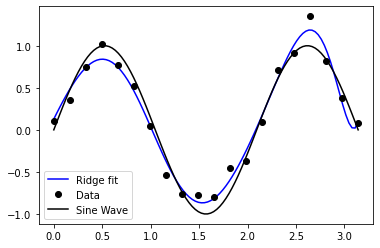

In [29]:
from sklearn.linear_model import Ridge

interp_x_transform = poly.fit_transform(np.reshape((interpolated_x), (len(interpolated_x), 1))) # Transform interpolated points
reg = Ridge(alpha=1e-2) # reg is the function we're going to use to transform our data
fit = reg.fit(x_transform, y); # Fit data
y_reg = fit.predict(interp_x_transform) # Predict the curve for our interpolated points
plt.plot(interpolated_x, y_reg, 'b', label='Ridge fit') # Plot the new fit
plt.plot(x, y, 'ko', label='Data') # Plot the original data
#plt.plot(interpolated_x, predicted_y, 'r')
plt.plot(interpolated_x, np.sin(3*interpolated_x), 'k', label='Sine Wave') # Plot the original sine wave
plt.legend();

As we can see, Ridge fit with a 13th degree polynomial isn't doing quite as well as for our original 6th degree polynomial fit, but it's a big improvement over our original 13th degree polynomial fit.
The important point to note is that using `Ridge`, we did over-fit the data, even when using the high degree polynomial interpolant.
This may seem confusing for now. We will return to **scikit-learn** to see some more uses for the package in some later lectures.

### References

1. Sumamry of math symbols recognized by Latex: https://www.caam.rice.edu/~heinken/latex/symbols.pdf
2. Documentation for NumPy `polyfit`: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
3. Betoule, M. E. A., R. Kessler, J. Guy, J. Mosher, D. Hardin, R. Biswas, P. Astier et al. "Improved cosmological constraints from a joint analysis of the SDSS-II and SNLS supernova samples." Astronomy & Astrophysics 568 (2014): A22. http://dx.doi.org/10.1051/0004-6361/201423413
4. Scikit-learn webpage: https://scikit-learn.org